<a href="https://colab.research.google.com/github/ShivinM-17/Tensorflow_practises/blob/main/Tensorflow_NN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression using Neural Networks in Tensorflow

In [1]:
# Importing tensorflow module
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating data to view and fit


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

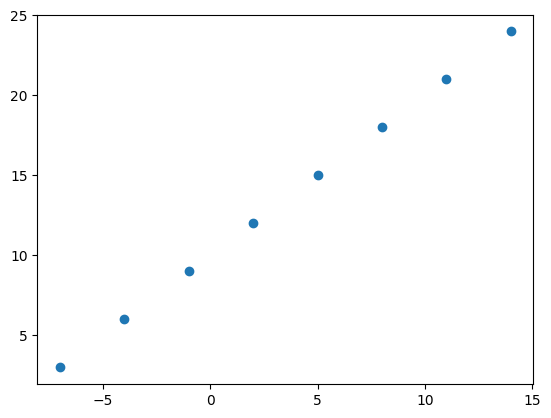

In [3]:
# Visualise it
plt.scatter(X,y)

In [4]:
# Trying to find the relationship of X and y
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
X.shape, y.shape

((8,), (8,))

### Input and Output shapes

In [6]:
# Creating a tensor for house price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
# Here are scalar tensors, rank=0, no shape
X[0].shape, y[0].shape

((), ())

In [9]:
X[0],y[0]

(-7.0, 3.0)

In [10]:
# Turn the NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Getting the input and output shapes
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with tensorflow

1) **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.          
2) **Compiling a model** - define the loss function (which tells how much wrong the model is) and the optimizer (which tells how the model should improve its patterns at the learning rate) and evaluation metrics.                                  
3) **Fitting a model** - letting the model to find the patterns between X and y

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae - Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 20.2615 - mae: 20.2615
Epoch 2/5
1/1 [==============================] - 0s 26ms/step - loss: 19.9802 - mae: 19.9802
Epoch 3/5
1/1 [==============================] - 0s 35ms/step - loss: 19.6990 - mae: 19.6990
Epoch 4/5
1/1 [==============================] - 0s 27ms/step - loss: 19.4177 - mae: 19.4177
Epoch 5/5
1/1 [==============================] - 0s 22ms/step - loss: 19.1365 - mae: 19.1365


In [14]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Try and predict values using the model
model.predict([17.0])

1/1 [==============================] - 0s 227ms/step


array([[-19.82295]], dtype=float32)

### Improving the model

We can improve the model, by altering the above steps to create a model.            
1) **Creating a model** - adding more layers, increase the number of hidden units (neurons), within each of the hidden layers, and also change the activation function of each layer                   
2) **Compiling a model** - change the optimization function, or the learning rate                                     
3) **Fitting a model** - give more number of epochs while fitting, or provide more data

In [16]:
# Rebuild the model to improve it

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 745ms/step - loss: 12.7117 - mae: 12.7117
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 12.5792 - mae: 12.5792
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 12.4467 - mae: 12.4467
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3142 - mae: 12.3142
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 12.1817 - mae: 12.1817
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0492 - mae: 12.0492
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 11.9167 - mae: 11.9167
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 11.7842 - mae: 11.7842
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6517 - mae: 11.6517
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 11.5192 - mae: 11.5192
Epoch 11/100
1/1 [==============================

In [17]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
# predicting using the model
model.predict([17.0])

1/1 [==============================] - 0s 322ms/step


array([[29.6737]], dtype=float32)

In [19]:
# Making one more improved model for prediction

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.012),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 13.6999 - mae: 13.6999
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7744 - mae: 11.7744
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1593 - mae: 10.1593
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7577 - mae: 8.7577
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1817 - mae: 7.1817
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 5.3104 - mae: 5.3104
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 3.8848 - mae: 3.8848
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 4.4928 - mae: 4.4928
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 5.1227 - mae: 5.1227
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 5.2748 - mae: 5.2748
Epoch 11/100
1/1 [==============================] - 0s 11ms/step 

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 122ms/step


array([[27.90312]], dtype=float32)

### Evaluating a model

In [21]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

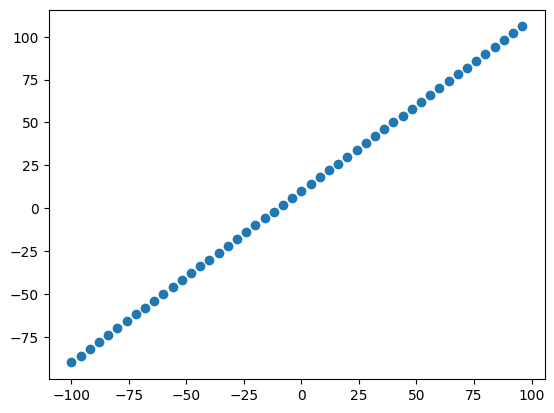

In [23]:
# Visualising the data
plt.scatter(X,y)

### Splitting the data into train/test set

In [24]:
X_train = X[:40]  # first 40 samples of the data (80% of the data)
y_train = y[:40]

X_test = X[40:]    # last 10 samples of the data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

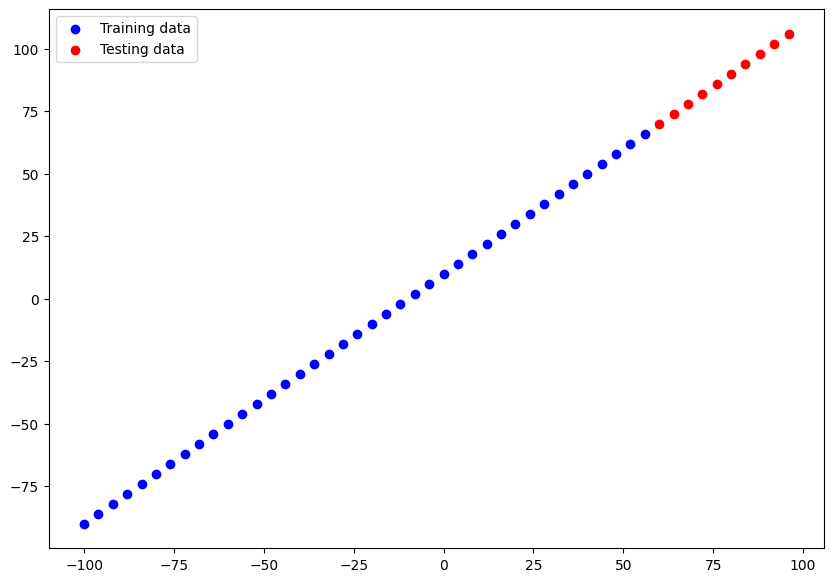

In [25]:
# Visualising the splitted data
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")

# Plot training data in red
plt.scatter(X_test,y_test,c="r",label="Testing data")

# Show a legend
plt.legend()

In [26]:
# Building neural network using the data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.012),
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=1000)


Epoch 1/1000
2/2 [==============================] - 2s 9ms/step - loss: 34.9800 - mae: 34.9800
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 28.3064 - mae: 28.3064
Epoch 3/1000
2/2 [==============================] - 0s 10ms/step - loss: 14.9671 - mae: 14.9671
Epoch 4/1000
2/2 [==============================] - 0s 8ms/step - loss: 11.7920 - mae: 11.7920
Epoch 5/1000
2/2 [==============================] - 0s 8ms/step - loss: 7.1714 - mae: 7.1714
Epoch 6/1000
2/2 [==============================] - 0s 7ms/step - loss: 10.2916 - mae: 10.2916
Epoch 7/1000
2/2 [==============================] - 0s 8ms/step - loss: 6.4820 - mae: 6.4820
Epoch 8/1000
2/2 [==============================] - 0s 8ms/step - loss: 8.2330 - mae: 8.2330
Epoch 9/1000
2/2 [==============================] - 0s 9ms/step - loss: 5.2670 - mae: 5.2670
Epoch 10/1000
2/2 [==============================] - 0s 7ms/step - loss: 4.5565 - mae: 4.5565
Epoch 11/1000
2/2 [==============================] - 0s 7m

In [27]:
model.predict([19])

1/1 [==============================] - 0s 127ms/step


array([[28.89105]], dtype=float32)

In [28]:
# Making a model which builds automatically based ont he input shape arguement
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
    tf.keras.layers.Dense(100, activation="relu"),
 #   tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 38.1384 - mae: 38.1384
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 26.7258 - mae: 26.7258
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 30.8871 - mae: 30.8871
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0306 - mae: 12.0306
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 16.7758 - mae: 16.7758
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.9502 - mae: 11.9502
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 15.7904 - mae: 15.7904
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4993 - mae: 8.4993
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 32.0695 - mae: 32.0695
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 22.7417 - mae: 22.7417
Epoch 11/100
2/2 [==============================] - 0s 10ms

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


- Total params - total number of parameters in the model                   
- Trainable parameters - parameters that the model can update as it trains         
- Non-trainable params - parameters that can't be updated during training

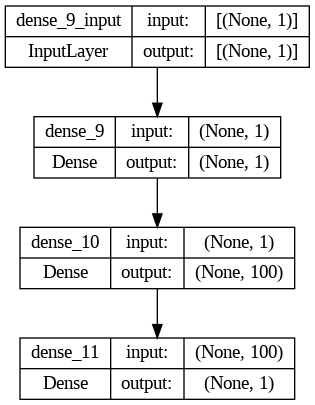

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [31]:
# Making a model which builds automatically based ont he input shape arguement
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.012),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 2s 15ms/step - loss: 38.2492 - mae: 38.2492
Epoch 2/1000
2/2 [==============================] - 0s 10ms/step - loss: 18.5983 - mae: 18.5983
Epoch 3/1000
2/2 [==============================] - 0s 10ms/step - loss: 8.9715 - mae: 8.9715
Epoch 4/1000
2/2 [==============================] - 0s 7ms/step - loss: 12.4282 - mae: 12.4282
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 12.0176 - mae: 12.0176
Epoch 6/1000
2/2 [==============================] - 0s 8ms/step - loss: 7.9601 - mae: 7.9601
Epoch 7/1000
2/2 [==============================] - 0s 8ms/step - loss: 5.9510 - mae: 5.9510
Epoch 8/1000
2/2 [==============================] - 0s 7ms/step - loss: 5.4304 - mae: 5.4304
Epoch 9/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.2669 - mae: 4.2669
Epoch 10/1000
2/2 [==============================] - 0s 7ms/step - loss: 4.4039 - mae: 4.4039
Epoch 11/1000
2/2 [==============================] - 0s 7m

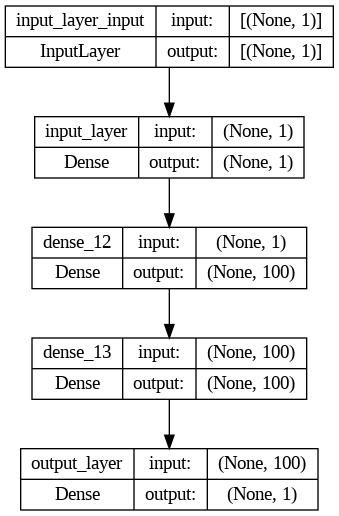

In [32]:
plot_model(model=model, show_shapes=True)

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,403
Trainable params: 10,403
Non-trainable params: 0
_________________________________________________________________


### Visualising model predictions

In [34]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 85ms/step


array([[ 67.0405  ],
       [ 70.85175 ],
       [ 74.66439 ],
       [ 78.476875],
       [ 82.28804 ],
       [ 86.09909 ],
       [ 89.91009 ],
       [ 93.72111 ],
       [ 97.53217 ],
       [101.34333 ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
# Creating a plotting function
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b",label="Training data")

  # Plot test data in blue
  plt.scatter(test_data, test_labels, c="g",label="Test data")

  # Plot model's prediction in red
  plt.scatter(test_data,predictions, c="r", label="Predictions")

  # Plotting the legend
  plt.legend()

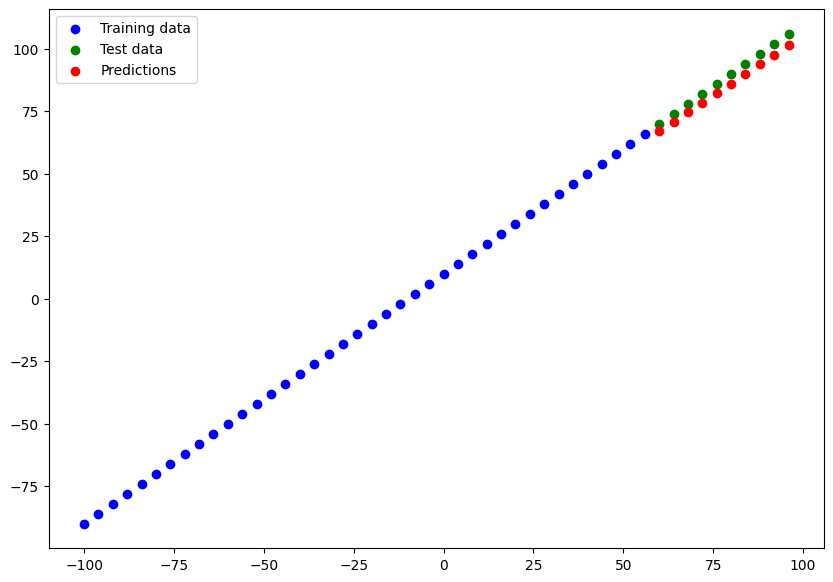

In [37]:
plot_predictions()

### Evaluating the model's predictions using regression evaluation metrics

In [38]:
# Mean absolute error
mae = tf.keras.losses.MeanAbsoluteError()

# Since here, we are inputting numpy array into the function,
# we get some different MAE values than expected.
mae(y_test, y_pred).numpy()

13.29942

In [39]:
# Therefore, converting the arrays into tensors
mae(tf.constant(y_test),tf.constant(y_pred)).numpy()

3.8072655

Now, we can see that we get the expected MAE, we got after fitting the data

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
y_pred

array([[ 67.0405  ],
       [ 70.85175 ],
       [ 74.66439 ],
       [ 78.476875],
       [ 82.28804 ],
       [ 86.09909 ],
       [ 89.91009 ],
       [ 93.72111 ],
       [ 97.53217 ],
       [101.34333 ]], dtype=float32)

In [42]:
# we squeeze the y_test tensor to make it same type as y_pred
tf.squeeze(tf.constant(y_test))

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
# Other function for MAE
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.8072655>

In [44]:
# Mean squared error
mse = tf.keras.losses.MeanSquaredError()
mse(y_test, tf.squeeze(y_pred)).numpy()

14.788691

In [45]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 193ms/step - loss: 3.8073 - mae: 3.8073


[3.807265520095825, 3.807265520095825]

### Running experiments to improve the model

1) Get more data - get more examples for the model to train on                    
2) Making the model larger (making more complex model) - in the form of more layers or more hidden units in each layer                                   
3) Train for longer - give model more time to find patterns in the data

In [46]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Performing 3 experiments -               
- **model_1** - 1 layer, trained for 100 epochs                                  
- **model_2** - 2 layers, trained for 100 epochs                               
- **model_3** - 2 layers, trained for 500 epochs

#### Build model_1

In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae","mse"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 33.6112 - mae: 33.6112 - mse: 1590.8536
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 8.9768 - mae: 8.9768 - mse: 108.2299
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 12.7792 - mae: 12.7792 - mse: 214.5080
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.3563 - mae: 8.3563 - mse: 106.1543
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 11.8570 - mae: 11.8570 - mse: 159.9556
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9806 - mae: 10.9806 - mse: 143.9526
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4617 - mae: 8.4617 - mse: 99.3681
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 8.8740 - mae: 8.8740 - mse: 108.4124
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 17.0985 - mae: 17.0985 - mse: 425.2603
Epoch 10/100
2/2

1/1 [==============================] - 0s 105ms/step


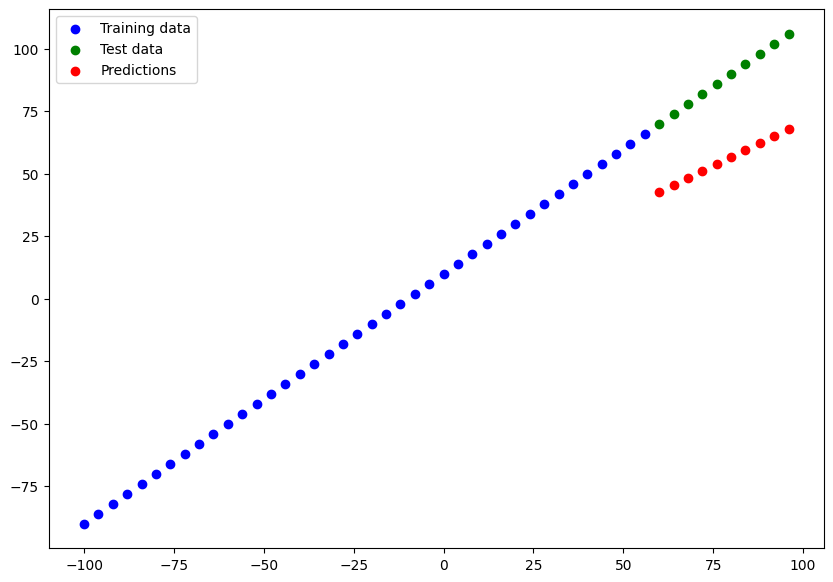

In [48]:
# Making and plotting the predictions

y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [49]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [50]:
y_pred_1

array([[42.85667 ],
       [45.62707 ],
       [48.397472],
       [51.167877],
       [53.938282],
       [56.708683],
       [59.479084],
       [62.24949 ],
       [65.0199  ],
       [67.7903  ]], dtype=float32)

In [51]:
# Calculating model_1 evaluation metrics

# Getting the mean_absolute_error
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_1))

# Getting the mean_squared_error
mse_1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.676517>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1080.228>)

#### Building Model_2

In [52]:
# Set the random seed
tf.random.set_seed(42)

# Creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(143, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae","mse"])

# Fitting the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 25ms/step - loss: 31.5256 - mae: 31.5256 - mse: 1390.4177
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 13.3037 - mae: 13.3037 - mse: 210.2607
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 5.0176 - mae: 5.0176 - mse: 39.4370
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0228 - mae: 10.0228 - mse: 147.8026
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 7.4179 - mae: 7.4179 - mse: 86.3267
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 4.9288 - mae: 4.9288 - mse: 32.1668
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 7.8297 - mae: 7.8297 - mse: 63.2957
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 6.0353 - mae: 6.0353 - mse: 45.5843
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 5.0117 - mae: 5.0117 - mse: 35.0852
Epoch 10/100
2/2 [======

1/1 [==============================] - 0s 89ms/step


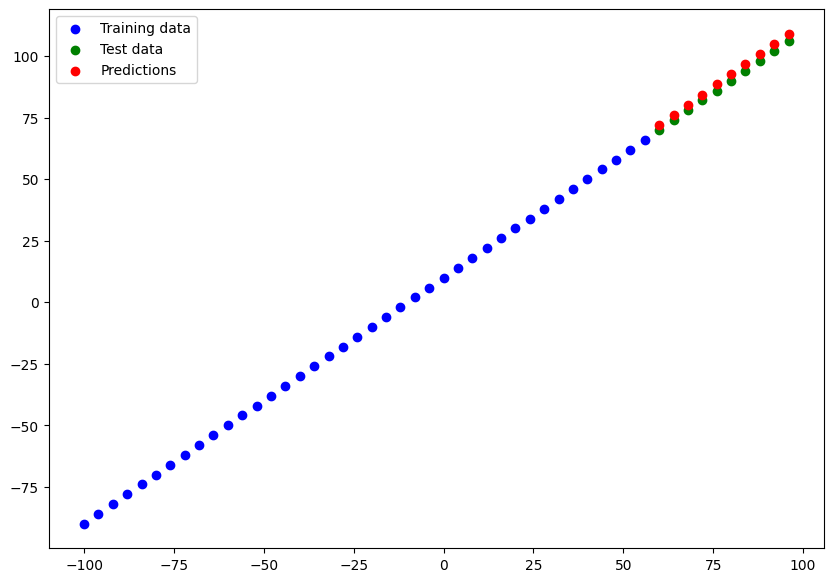

In [53]:
# Making and plotting the predictions

y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [54]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [55]:
y_pred

array([[ 67.0405  ],
       [ 70.85175 ],
       [ 74.66439 ],
       [ 78.476875],
       [ 82.28804 ],
       [ 86.09909 ],
       [ 89.91009 ],
       [ 93.72111 ],
       [ 97.53217 ],
       [101.34333 ]], dtype=float32)

In [56]:
# Calculating the evaluation metrics for model_2

# Mean absolute error
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_2))

# Mean squared error
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.5579505>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.661461>)

#### Building the model_3

In [62]:
# Setting up the random seed
tf.random.set_seed(42)

# Creating the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(12),
    tf.keras.layers.Dense(101, activation="relu"),
    tf.keras.layers.Dense(223, activation="relu"),
    tf.keras.layers.Dense(171, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compiling thr model 3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.012),
                metrics = ["mae","mse"]
)

# Fitting our model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 4s 21ms/step - loss: 36.8281 - mae: 36.8281 - mse: 1833.5250
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 17.2012 - mae: 17.2012 - mse: 531.0938
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 9.8782 - mae: 9.8782 - mse: 155.5016
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 13.6679 - mae: 13.6679 - mse: 251.0275
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 16.3489 - mae: 16.3489 - mse: 479.0575
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 8.7314 - mae: 8.7314 - mse: 123.9068
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 9.2051 - mae: 9.2051 - mse: 115.3843
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 9.5339 - mae: 9.5339 - mse: 116.8894
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 6.0415 - mae: 6.0415 - mse: 49.0309
Epoch 10/10

1/1 [==============================] - 0s 63ms/step


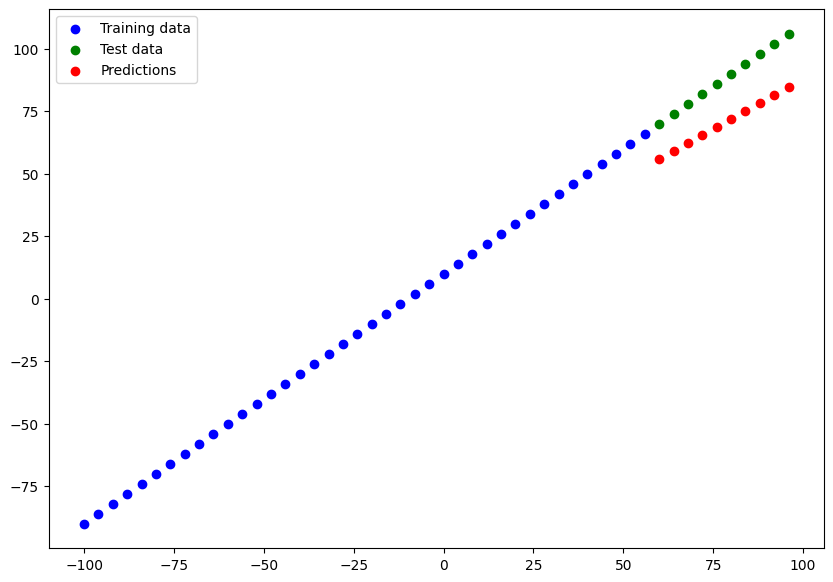

In [63]:
# Plotting the predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [64]:
# Calculating model_3 evaluation metrics

# mean absolute error
mae_3 = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_3))

# mean squared error
mse_3 = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_3))

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=17.595118>,
 <tf.Tensor: shape=(), dtype=float32, numpy=314.95078>)

Start with small models and layers, then keep increasing the complexity and layers if required

#### Comparing the results of the experiments

In [65]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(),mse_1.numpy()],
                 ["model_2", mae_2.numpy(),mse_2.numpy()],
                 ["model_3", mae_3.numpy(),mse_3.numpy()]]

results = pd.DataFrame(model_results,columns=["models","mae","mse"])
results

,models,mae,mse
0,model_1,32.676517,1080.228027
1,model_2,2.557950,6.661461
2,model_3,17.595118,314.950775


Out of the three models, we can say that the model_2 performs the best, with least mae and mse evaluation metrics

In [66]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                22        
                                                                 
 dense_16 (Dense)            (None, 143)               1716      
                                                                 
 dense_17 (Dense)            (None, 1)                 144       
                                                                 
Total params: 1,882
Trainable params: 1,882
Non-trainable params: 0
_________________________________________________________________


### Saving the model
There are two format to save the model:         
1) SavedModel Format                            
2) HDF5 format

In [67]:
# Saving the model using SavedModel format
model_2.save("Best_model_SaveModel_format")

In [68]:
# Saving the model using HDF5 format
model_2.save("Best_model_HDF5_format.h5")

### Loading the saved models

#### Loading a model in SavedModel format

In [69]:
# Loading in the SavedModel format
loaded_savedmodel_format = tf.keras.models.load_model("Best_model_SaveModel_format")

In [71]:
loaded_savedmodel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                22        
                                                                 
 dense_16 (Dense)            (None, 143)               1716      
                                                                 
 dense_17 (Dense)            (None, 1)                 144       
                                                                 
Total params: 1,882
Trainable params: 1,882
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                22        
                                                                 
 dense_16 (Dense)            (None, 143)               1716      
                                                                 
 dense_17 (Dense)            (None, 1)                 144       
                                                                 
Total params: 1,882
Trainable params: 1,882
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Comparing predictions of model_2 with the SavedModel format model
model_2_pred = model_2.predict(X_test)
SavedModel_format_pred = loaded_savedmodel_format.predict(X_test)

1/1 [==============================] - 0s 51ms/step


In [76]:
# Calculating the MAE of both the models
model_2_mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(model_2_pred))
SavedModel_format_mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(SavedModel_format_pred))

In [77]:
model_2_mae, SavedModel_format_mae

(<tf.Tensor: shape=(), dtype=float32, numpy=2.5579505>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.5579505>)

#### Loading a model in h5 format

In [78]:
loaded_h5_model = tf.keras.models.load_model("/content/Best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                22        
                                                                 
 dense_16 (Dense)            (None, 143)               1716      
                                                                 
 dense_17 (Dense)            (None, 1)                 144       
                                                                 
Total params: 1,882
Trainable params: 1,882
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_preds = loaded_h5_model.predict(X_test)

1/1 [==============================] - 0s 115ms/step


In [80]:
# Checking if same predictions
model_2_preds == loaded_h5_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [81]:
# Calculating the MAE of both the models
model_2_mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(model_2_preds))
loaded_h5_mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(loaded_h5_preds))

In [82]:
model_2_mae, loaded_h5_mae

(<tf.Tensor: shape=(), dtype=float32, numpy=2.5579505>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.5579505>)